### Curso de Verão 2022 - Desenvolvimento de Sistemas Computacionais Inteligentes - EaD

# Projeto Parte 1 - Pipeline de Treinamento

#### Marlon Resende Faria (marlonresendefaria@gmail.com)
#### João Paulo Fumes Beneton (beneton@usp.br)

In [3]:
# Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import svm
import seaborn as sns
import pickle
import os

# Conjuntos de dados

In [5]:
# recupera o caminho dos arquivos de dados, modelo e métricas do environment
DATASET_PATH =  os.environ['DATASET_PATH']
MODEL_PATH =  os.environ['MODEL_PATH']
METRICS_PATH =  os.environ['METRICS_PATH']

,product_id,seller_id,query,search_page,position,title,concatenated_tags,creation_date,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,category
0,11394449,8324141,espirito santo,2,6,Mandala Espírito Santo,mandala mdf,2015-11-14 19:42:12,171.890000,1200.0,1,4,244,NaN,Decoração
1,15534262,6939286,cartao de visita,2,0,Cartão de Visita,cartao visita panfletos tag adesivos copos lon...,2018-04-04 20:55:07,77.670000,8.0,1,5,124,NaN,Papel e Cia
2,16153119,9835835,expositor de esmaltes,1,38,Organizador expositor p/ 70 esmaltes,expositor,2018-10-13 20:57:07,73.920006,2709.0,1,1,59,NaN,Outros
3,15877252,8071206,medidas lencol para berco americano,1,6,Jogo de Lençol Berço Estampado,t jogo lencol menino lencol berco,2017-02-27 13:26:03,118.770004,0.0,1,1,180,1.0,Bebê
4,15917108,7200773,adesivo box banheiro,3,38,ADESIVO BOX DE BANHEIRO,adesivo box banheiro,2017-05-09 13:18:38,191.810000,507.0,1,6,34,NaN,Decoração


In [6]:
# fazemos uma cópia do conjunto de dados para trabalhar
dados = pd.read_csv(DATASET_PATH)
df = dados.copy()
# Exibe as variavéis do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         38000 non-null  int64  
 1   seller_id          38000 non-null  int64  
 2   query              38000 non-null  object 
 3   search_page        38000 non-null  int64  
 4   position           38000 non-null  int64  
 5   title              38000 non-null  object 
 6   concatenated_tags  37998 non-null  object 
 7   creation_date      38000 non-null  object 
 8   price              38000 non-null  float64
 9   weight             37942 non-null  float64
 10  express_delivery   38000 non-null  int64  
 11  minimum_quantity   38000 non-null  int64  
 12  view_counts        38000 non-null  int64  
 13  order_counts       17895 non-null  float64
 14  category           38000 non-null  object 
dtypes: float64(3), int64(7), object(5)
memory usage: 4.3+ MB


In [ ]:
df.head() # Exibe as 5 primeiras observações do conjunto de dados

# Análise Exploratória do Conjunto de dados

Na célula abaixo, executamos uma breve análise exploratória de dados. 

Verificamos pelo gráfico de barras abaixo o balanceamento entre as categorias. Nota-se que a categoria "Lembrancinhas" tem muito mais observações, seguida de 
"Decoração", "Bebê", "Papel e Cia" e "Bijouterias".

As observações que não se encaixam em nenhuma das citadas devem estar agrupadas na categoria "Outros". 

Analisou-se, também, que as variáveis numéricas apresentam correlação pouco expressiva com a categoria (variável). Diante disso, optamos por não utilizar dessas "features" númericas. Uma investigação mais profunda é necessária 


Sendo assim, optou-se por criar um modelo simplificado, que utlizasse apenas categorias e os títulos.

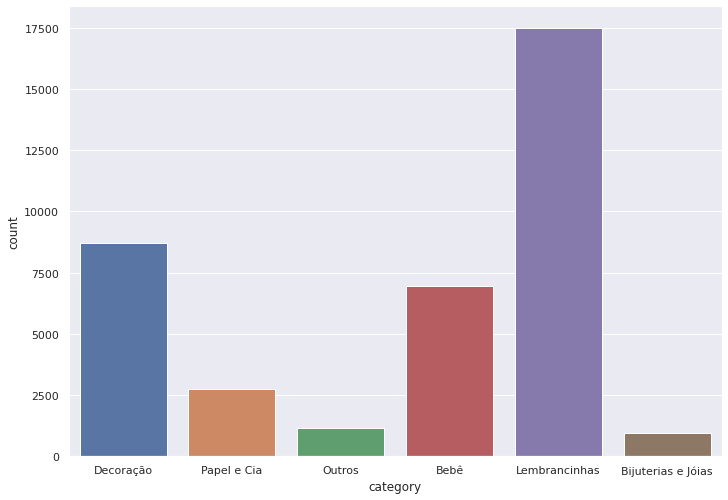

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
figure = sns.countplot(x=df.category)

In [7]:
# Correlaçõe
decoracao = df.copy()
decoracao['Decoração'] = np.where(decoracao.category == "Decoração",1, 0)
decoracao.drop(['category'], axis=1, inplace = True)
decoracao.corr(method ='pearson')
papel = df.copy()
papel['Papel'] = np.where(papel.category == "Papel e Cia",1, 0)
papel.drop(['category'], axis=1, inplace = True)
papel.corr(method ='pearson')
outros = df.copy()
outros['Outros'] = np.where(outros.category == "Outros",1, 0)
outros.drop(['category'], axis=1, inplace = True)
outros.corr(method ='pearson')
bebe = df.copy()
bebe['Bebê'] = np.where(bebe.category == "Bebê",1, 0)
bebe.drop(['category'], axis=1, inplace = True)
bebe.corr(method ='pearson')
lembrancinhas = df.copy()
lembrancinhas['Lembrancinhas'] = np.where(lembrancinhas.category == "Lembrancinhas",1, 0)
lembrancinhas.drop(['category'], axis=1, inplace = True)
lembrancinhas.corr(method ='pearson')
bijuterias = df.copy()
bijuterias['Bijuterias'] = np.where(bijuterias.category == "Bijuterias e Jóias",1, 0)
bijuterias.drop(['category'], axis=1, inplace = True)
bijuterias.corr(method ='pearson')

,product_id,seller_id,search_page,position,price,weight,express_delivery,minimum_quantity,view_counts,order_counts,Bijuterias
product_id,1.000000,-0.009154,0.001496,0.001491,0.008519,0.000384,-0.008746,-0.005836,0.010446,0.011257,0.004581
seller_id,-0.009154,1.000000,-0.015809,-0.015057,0.009642,0.013518,-0.008498,0.009972,0.014686,0.008431,0.026396
search_page,0.001496,-0.015809,1.000000,0.056025,-0.003117,-0.021321,0.028977,0.022212,-0.024137,-0.010976,-0.028005
position,0.001491,-0.015057,0.056025,1.000000,-0.002733,-0.010474,-0.000635,0.005860,-0.063485,-0.049970,0.000451
price,0.008519,0.009642,-0.003117,-0.002733,1.000000,0.213749,-0.043075,-0.080053,-0.001754,-0.029391,0.086873
weight,0.000384,0.013518,-0.021321,-0.010474,0.213749,1.000000,-0.051436,-0.037468,0.013237,0.009948,-0.026346
express_delivery,-0.008746,-0.008498,0.028977,-0.000635,-0.043075,-0.051436,1.000000,0.085348,-0.020879,-0.033728,-0.142674
minimum_quantity,-0.005836,0.009972,0.022212,0.005860,-0.080053,-0.037468,0.085348,1.000000,0.030824,0.031857,-0.037131
view_counts,0.010446,0.014686,-0.024137,-0.063485,-0.001754,0.013237,-0.020879,0.030824,1.000000,0.639746,0.001339
order_counts,0.011257,0.008431,-0.010976,-0.049970,-0.029391,0.009948,-0.033728,0.031857,0.639746,1.000000,0.016677


# Classificador de Texto


*   O Naive Bayes é adequado para classificação com características discretas (como, por exemplo, contagem de palavras para classificação de texto).




In [24]:
# definição das variáveis para o modelo e separação dos dados para treino e teste.
x = df['title']


df['código'] = pd.factorize(df['category'])[0]# converte as categorias, definidas em strings em números. Posteriormente
y = df['código']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [25]:
# O Naive Bayes é adequado para classificação com características discretas (como, por exemplo, contagem de palavras para classificação de texto).
text_clf = Pipeline([('vetorizador', CountVectorizer(strip_accents='ascii',
                              lowercase=True)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())
                     ])
# modelo treinado
text_clf = text_clf.fit(x_train, y_train)


In [26]:
y_pred = text_clf.predict(x_test)

In [27]:
# Métricas
# Criação de relatório de texto mostrando as principais métricas de classificação
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1729
           1       0.93      0.41      0.57       563
           2       1.00      0.16      0.27       229
           3       0.88      0.80      0.84      1392
           4       0.81      0.97      0.88      3477
           5       0.99      0.65      0.78       210

    accuracy                           0.83      7600
   macro avg       0.91      0.64      0.70      7600
weighted avg       0.85      0.83      0.82      7600

[[1463    3    0   56  207    0]
 [  44  232    0   10  277    0]
 [  75    3   36   30   85    0]
 [  72    2    0 1111  207    0]
 [  53    9    0   48 3366    1]
 [  29    0    0   10   35  136]]


In [ ]:
# armazena os resultados das métricas e salva em arquivo txt
a = str(classification_report(y_test, y_pred))
b = str(confusion_matrix(y_test, y_pred))

# Remove o arquivo, caso já exista
try:
    os.remove("metricas.txt")
except OSError:
    pass

# salva o arquivo
with open("metricas.txt", "w") as text_file:
    text_file.write(a+b)

In [28]:
# Cálculo do erro médio absoluto para avaliação do modelo
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.4160526315789474

In [29]:
# Cálculo do erro médio qudrático para avaliação do modelo
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.2776315789473685

In [32]:
# R-quadradodo modelo para avaliação do modelo
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5470758957512281

# Salvar modelo treinado

In [22]:
# Salva o modelo em arquivo pickle. Vale comentar é salvo todo pipeline, que processará e vetorizará os dados para serem análisados pelo modelo.

# Remove o arquivo, caso já exista
try:
    os.remove("modelo_classificador_texto_MB.sav")
except OSError:
    pass

#salva o arquivo
nome_arquivo = 'modelo_classificador_texto_MB.sav'
pickle.dump(text_clf, open(nome_arquivo, 'wb'))

# Carregar modelo treinado salvo

In [ ]:
modelo_carregado = pickle.load(open(nome_arquivo, 'rb'))
result = modelo_carregado.score(x_test, y_test)
result

In [ ]:
# cria um dionário com as colunas código e category do dataframe. Usaremos para traduzir o resultado, que foi dado como número
nomes_das_categorias = df.set_index('código').to_dict()['category']
nomes_das_categorias

# Utilizar o modelo

Para usar o modelo, cria-se uma lista qualquer com descrição de objetos similares aos que constituem o conjunto. Tal lista é declarada como "lista_de_teste".
Em seguida resgata-se os nomes das categorias que haviam sido convertidas em valores númericos.
Finalmente, define-se um função cujos paramêtros são:
- uma lista as novas observações para serem categorizadas,;
- o modelo, previamente carregado
- um dicionário para conversão das catégorias númericas em strings.

In [ ]:
# Lista com títulos espontanêamente criados
lista_de_teste = ['CArrinho para bebe', 'fraudas para bebê','imãs de geladeira','Catena tinteiro',''] 
#
# cria um dionário com as colunas código e category do dataframe. Usaremos para traduzir o resultado, que foi dado como número
nomes_das_categorias = df.set_index('código').to_dict()['category']
nomes_das_categorias

def categorizar(lista,modelo,nomes_das_categorias):
    """
        Parameters
    ----------
    list : list of strings

    Pipeline : sklearn.pipeline.Pipeline
      
    dictionary : dictionary to translate categorys

    Returns
    -------
    list
    list of the predicted categorys
    """
    previsto = modelo_carregado.predict(lista)
    for i in range(len(lista)):
        print(lista[i],': ',nomes_das_categorias[previsto[i]])

In [ ]:
# Será que funfou? 
categorizar(lista_de_teste,modelo_carregado,nomes_das_categorias)